# Compare Classifiers
*Paulo G. Martinez* Fri. Apr. 3, 2020

---

## Use Titanic Data Set, Adapt it for our Demo

**prep environment**

In [1]:
import numpy as np
import pandas as pd
import re

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns


**load data**
Use titanic data set for its mix of numeric and categoricals

In [11]:
# load data
data_df = pd.concat([pd.read_csv('data/train.csv'), pd.read_csv('data/test.csv')], ignore_index=True)
data_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Define Targets and Simplify Features for Demo
A multiclass categorical with class imbalances

In [14]:
data_df.Embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: Embarked, dtype: int64

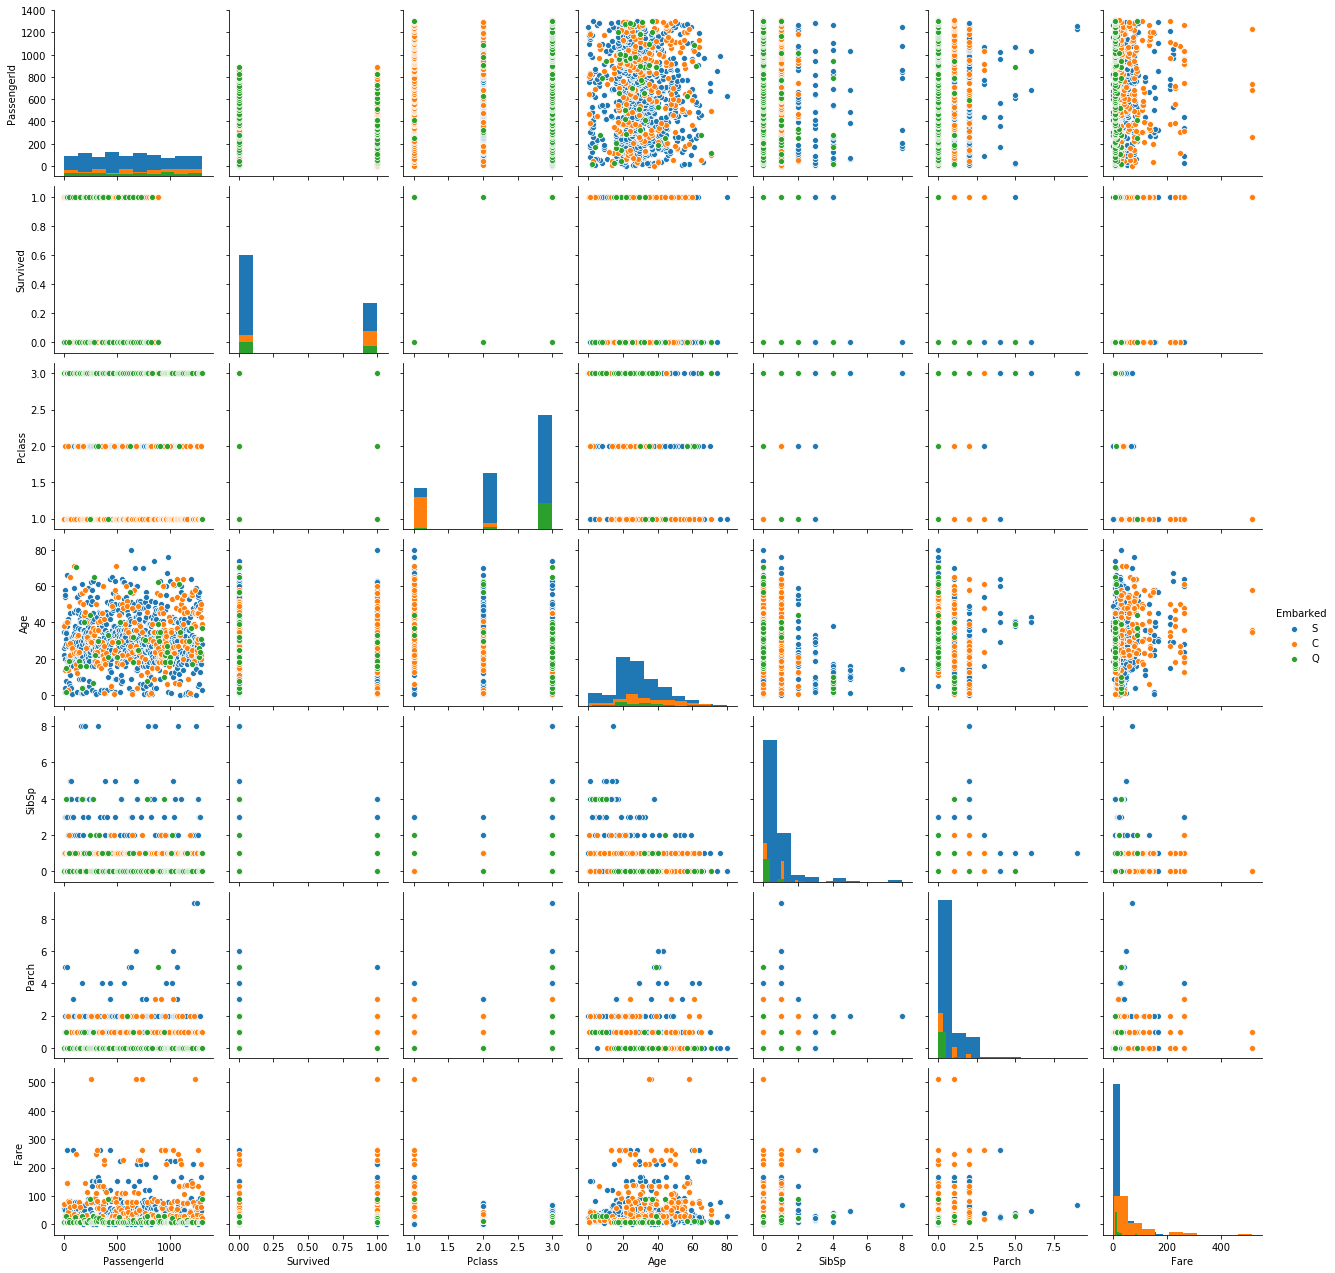

In [15]:
sns.pairplot(data_df, hue = 'Embarked', diag_kind = 'hist')
plt.show()

**Add a Binary Classification Target for the lightest class**

In [16]:
for clss in data_df.Embarked.dropna().unique():
    data_df[f'EMBARKED_{clss}'] = [emb == clss for emb in data_df.Embarked]

In [17]:
data_df['EMBARKED_Q'] = [emb == 'Q' for emb in data_df.Embarked]
data_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EMBARKED_S,EMBARKED_C,EMBARKED_Q
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False


**drop unhelpful columns**

In [18]:
# only keep a naive attempt at last names
data_df['Name'] = data_df.Name.map(
    lambda s: s.split(',')[0].lower()
)
data_df.Name.value_counts()[:5]

sage         11
andersson    11
goodwin       8
asplund       8
davies        7
Name: Name, dtype: int64

In [19]:
# only keep the alphabetic components of ticket
data_df['Ticket'] = data_df['Ticket'].map(
    lambda s: "".join(c for c in s if c.isalpha()).lower()
)
# scrub empty strings to nulls
data_df['Ticket'] = data_df['Ticket'].map(
    lambda s: None if s == "" else s
)
data_df.Ticket.value_counts()[:5]

pc         92
ca         68
a          39
sotonoq    24
stono      21
Name: Ticket, dtype: int64

In [20]:
data_df.drop(columns = ['PassengerId'], inplace = True)

In [24]:
data_df.rename(columns = {'Embarked': 'EMBARKED'}, inplace = True)
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,EMBARKED,EMBARKED_S,EMBARKED_C,EMBARKED_Q
0,0.0,3,braund,male,22.0,1,0,a,7.2500,NaN,S,True,False,False
1,1.0,1,cumings,female,38.0,1,0,pc,71.2833,C85,C,False,True,False
2,1.0,3,heikkinen,female,26.0,0,0,stono,7.9250,NaN,S,True,False,False
3,1.0,1,futrelle,female,35.0,1,0,None,53.1000,C123,S,True,False,False
4,0.0,3,allen,male,35.0,0,0,None,8.0500,NaN,S,True,False,False


# save this data

In [25]:
data_df.to_csv('data/semi_processed_all.csv', index = False)